In [120]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import naive_bayes

In [118]:
irisData = datasets.load_iris()
print("irisData.data shape :",irisData.data.shape)
print("irisData.target shape :",irisData.target.shape)
print(irisData.data)
print(irisData.target)

irisData.data shape : (150, 4)
irisData.target shape : (150,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3

In [18]:
irisData.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

##### class_distribution is a function that is going to show the distribution of different classes in a target set

In [84]:
def class_distribution(target_set):
    elts, counts = np.unique(target_set, return_counts=True)
    print('The distribution of the different classes is : ')
    for elt,count in zip(elts,counts):
        print(irisData.target_names[elt],count)

In [85]:
class_distribution(irisData.target)

The distribution of the different classes is : 
setosa 50
versicolor 50
virginica 50


In [27]:
print('The different values of the 32th element :',irisData.data[31])
print("The 32th element's class :",irisData.target[31] , "===" , irisData.target_names[irisData.target[31]])

The different values of the 32th element : [5.4 3.4 1.5 0.4]
The 32th element's class : 0 === setosa


##### plot_2D creates a 2D scatter plot to visualize a dataset with multiple classes by working on its first and second features distribution.

In [32]:
from itertools import cycle
import pylab as pl


def plot_2D(data, target, target_names):
    colors = cycle('rgbcmykw')  # cycle de couleurs
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1], c=c, label=label)
        pl.legend()
    pl.show()

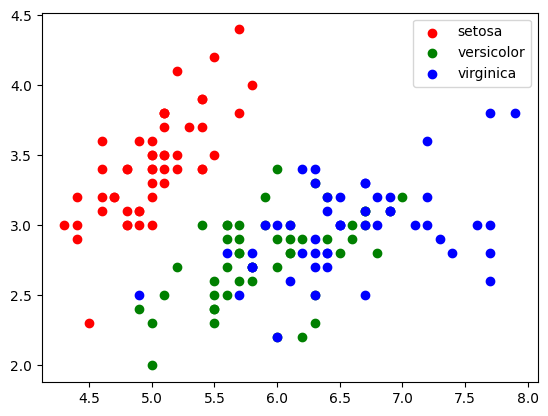

In [33]:
plot_2D(irisData.data, irisData.target, irisData.target_names)

##### This is the predefined function of plot_2D that we can find in matplotlib.pyplot

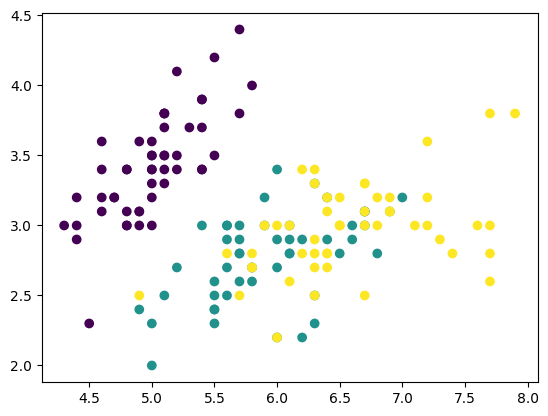

In [6]:
plt.scatter(irisData.data[:, 0], irisData.data[:, 1], c=irisData.target, )

##### By working on the third and fourth features , we can have a better separation between our classes

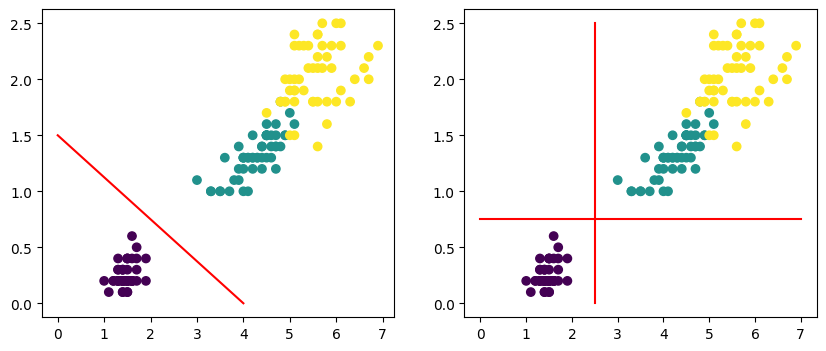

In [44]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(irisData.data[:, 2], irisData.data[:, 3], c=irisData.target )
plt.plot([0, 4], [1.5, 0], c="r")
plt.subplot(1,2,2)
plt.scatter(irisData.data[:, 2], irisData.data[:, 3], c=irisData.target )
plt.plot([2.5, 2.5], [0, 2.5], c="r")
plt.plot([0, 7], [0.75, 0.75], c="r")
plt.show()

##### Working with NaiveBayes

In [141]:
np.random.seed(0)
nb = naive_bayes.MultinomialNB(fit_prior=True)
irisData = datasets.load_iris()
nb.fit(irisData.data[:-1], irisData.target[:-1]) #we didn't include the last element in the training set because we
                                                 #are going to test with it
p31 = nb.predict(irisData.data[[31]])
print("The predicted class for the 32th element :",p31)
last = nb.predict(irisData.data[[-1]])
print("The predicted class for the last element :",last)
p = nb.predict(irisData.data)
print("Error rate when training and testing on the whole data",1-nb.score(irisData.data, irisData.target))

The predicted class for the 32th element : [0]
The predicted class for the last element : [2]
Error rate when training and testing on the whole data 0.033333333333333326


##### The score is equal to 0 . In this case , that's the expected result since we did train our model only on 2 classes , and then we tested it on instances from a totally different class that he has never seen before.

In [58]:
nb = naive_bayes.MultinomialNB(fit_prior=True)
nb.fit(irisData.data[:99], irisData.target[:99])
nb.score(irisData.data[100:], irisData.target[100:])

0.0

##### Three different methods to get the error rate

In [59]:
ea = 0
for i in range(len(irisData.data)):
    if p[i] != irisData.target[i]:
        ea = ea+1
print("The number of false predictions is :",ea)
print("The error rate is :",ea/len(irisData.data))

The number of false predictions is : 5
The error rate is : 0.03333333333333333


In [67]:
ea = irisData.target - p
ea = ea[ea != 0]
print("The number of false predictions is :",len(ea))
print("The error rate is :",len(ea)/len(irisData.data))

The number of false predictions is : 5
The error rate is : 0.03333333333333333


In [70]:
print("The error rate is :",1 - nb.score(irisData.data,irisData.target))

The error rate is : 0.033333333333333326


##### Recreating the train_test_split function with test_size = 1/3 and shuffle = True

In [155]:
def split(S):
    data = S.data
    target = S.target
    true_values = np.ones((100, 1), dtype=bool)
    false_values = np.zeros((50, 1), dtype=bool)
    mask_values = np.vstack((true_values, false_values))
    np.random.shuffle(mask_values)
    mask_values.reshape(150, 1)
    return data[mask_values[:,0] == True], data[mask_values[:,0] == False], target[mask_values[:,0] == True], target[mask_values[:,0] == False]

##### We can see that the different classes are equally distributed in the train and test set

In [89]:
train_x, test_x, train_y, test_y = split(irisData)
print('In train_y')
class_distribution(train_y)
print('-'*50)
print('In test_y')
class_distribution(test_y)

In train_y
The distribution of the different classes is : 
setosa 33
versicolor 33
virginica 34
--------------------------------------------------
In test_y
The distribution of the different classes is : 
setosa 17
versicolor 17
virginica 16


In [156]:
def test(S , model):
    train_x, test_x, train_y, test_y = split(S)
    model.fit(train_x,train_y)
    return 1 - model.score(test_x,test_y)

##### We will have different error rate 's value each time we execute the test function because the training set in randomly generated at each execution so we will have different models

In [136]:
print("Error rate in the first run : ",test(irisData,nb))
print("Error rate in the second run : ",test(irisData,nb))

Error rate in the first run :  0.4
Error rate in the second run :  0.06000000000000005


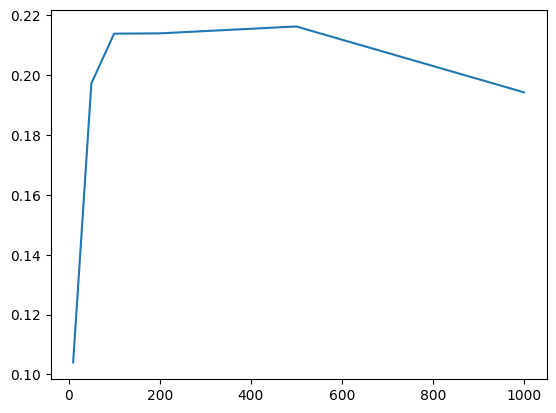

In [100]:
looping_list = [10,50,100,200,500,1000]
averages = []
for elt in looping_list:
    score = 0
    for i in range(elt):
        score += test(irisData,nb)
    averages.append(score/elt)
plt.plot(looping_list,averages)

##### Using sklearn.model_selection.train_test_split

##### When using small values for test_size => High Error Rate =>  Model overfitts and memorises the train set
##### When using large values for test_size => High Error Rate =>  Model underfitts since it wasn't trained on enough data

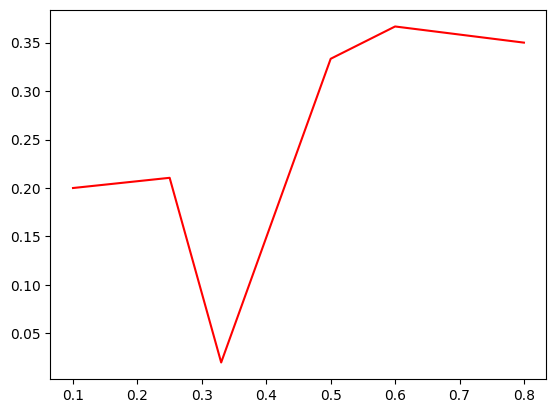

In [115]:
testing_list = [0.1,0.25,0.33,0.5,0.6,0.8]
values = []
for test in testing_list:
    x_train, x_test, y_train, y_test = train_test_split(irisData.data,irisData.target,test_size=test,shuffle=True)
    nb.fit(x_train,y_train)
    values.append(1-nb.score(x_test,y_test))
plt.plot(testing_list,values,c="r")

##### sklearn.model_selection.cross_val_score

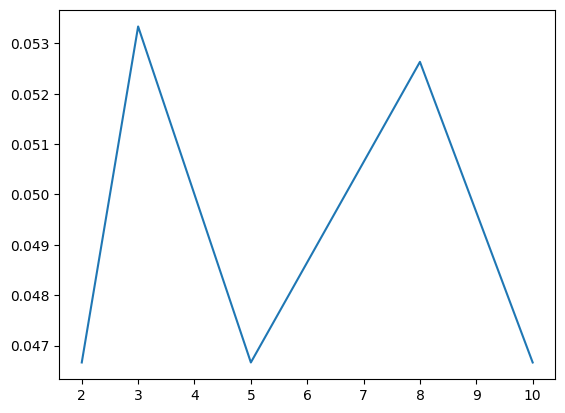

In [119]:
splits_nbr = [2,3,5,8,10]
values = []
for split in splits_nbr:
    values.append(1 - cross_val_score(nb , irisData.data , irisData.target , cv = split).mean())
plt.plot(splits_nbr , values)

##### Doing the same work with DecisionTreeClassifier instead of NaiveBayes

Using DecisionTreeClassifier
The predicted class for the 32th element : [0]
The predicted class for the last element : [2]
Error rate when training and testing on the whole data 0.0
Error rate with test function created above
Error rate in the first run :  0.040000000000000036
Error rate in the second run :  0.06000000000000005
Error rate with train_test_split over different test_size values : 


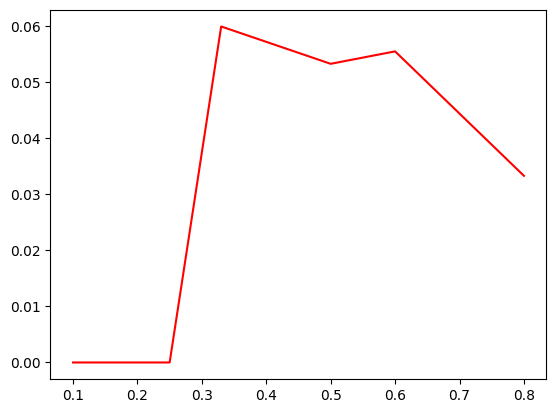

Error rate with cross validation using different splits : 


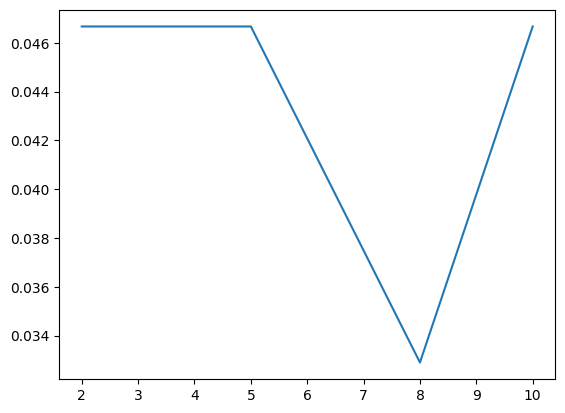

In [157]:
print("Using DecisionTreeClassifier")
model = DecisionTreeClassifier()
model.fit(irisData.data[:-1], irisData.target[:-1]) #we didn't include the last element in the training set because we
                                                 #are going to test with it
p31 = model.predict(irisData.data[[31]])
print("The predicted class for the 32th element :",p31)
last = model.predict(irisData.data[[-1]])
print("The predicted class for the last element :",last)
p = model.predict(irisData.data)
print("Error rate when training and testing on the whole data",1-model.score(irisData.data, irisData.target))
print('Error rate with test function created above')
print("Error rate in the first run : ",test(irisData,model))
print("Error rate in the second run : ",test(irisData,model))
print('Error rate with train_test_split over different test_size values : ')
testing_list = [0.1,0.25,0.33,0.5,0.6,0.8]
values = []
for test in testing_list:
    x_train, x_test, y_train, y_test = train_test_split(irisData.data,irisData.target,test_size=test,shuffle=True)
    model.fit(x_train,y_train)
    values.append(1-model.score(x_test,y_test))
plt.plot(testing_list,values,c="r")
plt.show()
print('Error rate with cross validation using different splits : ')
splits_nbr = [2,3,5,8,10]
values = []
for split in splits_nbr:
    values.append(1 - cross_val_score(model , irisData.data , irisData.target , cv = split).mean())
plt.plot(splits_nbr , values)
plt.show()

##### Test Error summary
<img src="test_error_summary.png" width="1200">